<a href="https://colab.research.google.com/github/svpino/machine-learning/blob/master/multiplication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [18]:
DATASET_TRAINING_SIZE = 100
DATASET_TESTING_SIZE = 1000

Let's first generate the training dataset using values ranging from 'low' to 'high'.

We can determine the training labels by multiplying each pair generated before.

In [19]:
X = np.random.randint(low=1, high=9, size=(DATASET_TRAINING_SIZE, 2))
y = np.prod(X, axis=1).reshape(DATASET_TRAINING_SIZE, 1)

Since we are trying to approximate multiplication, we know there will be a lot of variance in the results. Also, multipliying numbers can really quickly spin our neural network out of control so we are going to normalizing the input values. In this case, we are using log normalization.

In [20]:
X = np.log(X)

Time to set up our neural network

In [21]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=4, input_shape=(2,)),
  tf.keras.layers.Dense(units=4, activation="relu"),
  tf.keras.layers.Dense(units=1)
])

model.compile(
    loss='mean_squared_error', 
    optimizer=tf.keras.optimizers.Adam(0.01)
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


Now we can start training the network with our input dataset

In [22]:
history = model.fit(X, y, epochs=250, batch_size=10, verbose=False)

At this point we already have our model fully trained. We can now generate some testing data (using the same method we used to generate our training data).

In [23]:
X_test = np.random.randint(low=1, high=9, size=(DATASET_TESTING_SIZE, 2))
y_test = np.prod(X_test, axis=1).reshape(DATASET_TESTING_SIZE, 1)

We need to apply the same log normalization to the test data (that's how we trained our network.) 

But before we do that, let's print 10 examples so we know what we should be expecting.

In [24]:
print(f"X_test:\n{X_test[:10]}")
print(f"y_test:\n{y_test[:10]}")

X_test = np.log(X_test)

X_test:
[[8 4]
 [1 1]
 [6 1]
 [8 6]
 [3 8]
 [2 8]
 [8 3]
 [3 2]
 [8 7]
 [3 8]]
y_test:
[[32]
 [ 1]
 [ 6]
 [48]
 [24]
 [16]
 [24]
 [ 6]
 [56]
 [24]]


Let's now predict on our test dataset and print the top 10 results

In [25]:
predictions = model.predict(X_test)
print(f"Predictions:\n{predictions[:10]}")

Predictions:
[[31.303698 ]
 [ 1.1788328]
 [ 6.5795193]
 [48.02962  ]
 [24.311125 ]
 [15.0336895]
 [24.434305 ]
 [ 6.605032 ]
 [54.38852  ]
 [24.311125 ]]


To see how we did, we can compute the RMSE on the results we got

In [26]:
rmse = np.sqrt(np.mean((predictions - y_test)**2))
print(f"\nRMSE: {rmse}")


RMSE: 0.8508553986206628


Finally, we can plot the loss during training. 

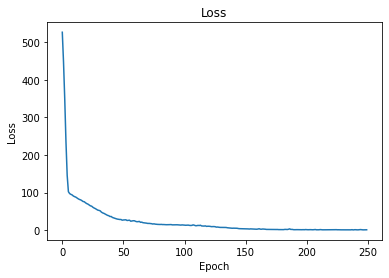

In [27]:
plt.title("Loss")
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.plot(history.history['loss'])